In [68]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
df_withlabel = pd.read_csv('datasets/listings_features_with_label.csv', index_col=['id'])

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (22,73,74) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [70]:
df_withlabel = df_withlabel[['Demo % - ACS 2011 Means of transportation: Public transportation - Subway - Zipcode',
       'Demo % - Age - Age 00 - 14 - Zipcode - ACS 2011',
       'Demo % - Age - Age 15 - 29 - Zipcode - ACS 2011',
       'Demo % - Age - Age 30 - 44 - Zipcode - ACS 2011',
       'Demo % - Age - Age 45 - 59 - Zipcode - ACS 2011',
       'Demo % - Age - Age 60 + - Zipcode - ACS 2011',
       'Demo % - Education - Pop 25 yrs + Bachelors Degree - Zipcode - ACS 2011',
       'Demo % - Education - Pop 25 yrs + Masters degree - Zipcode - ACS 2011',
       'Demo % - Ethnicity - Non-White Population - Zipcode - ACS 2011',
       'Demo % - Households - Household Size: 1-2 Persons - Zipcode - ACS 2011',
       'Demo % - Households - Household Size: 3+ Persons - Zipcode - ACS 2011',
       'Demo % - Households - Household Size: 7 + Persons - Zipcode - ACS 2011',
       'Demo % - Income - Hhld Income $100,000 + % - Zipcode - ACS 2011',
       'Demo % - Population - Female Population - Zipcode - ACS 2011',
       'Demo % - Population - Male Population - Zipcode - ACS 2011',
       'Demo - Age - Median Age Total Population - Zipcode - ACS 2011',
       'Demo - Households - Median Household Income - Zipcode - ACS 2011',
       'Demo - Population Density - Total - Zipcode - ACS 2011', 'Label']]

In [71]:
df = pd.read_csv('datasets/merged_wo_features_df.csv', index_col='id')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [72]:
df = df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1','Unnamed: 0.1.1', 'Unnamed: 0.1.1.1'])

In [73]:
df

,last_scraped,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,latitude,longitude,geometry,...,idpop_citywide_food_sum,idpop_local_nightlife_sum,idpop_citywide_nightlife_sum,idpop_local_travel_sum,idpop_citywide_travel_sum,venue_count_500m,sub_cnt_20m,sub__line_cnt_20m,comp,comp_hotel
id,,,,,,,,,,,,,,,,,,,,,
5435.0,2019-03-07,Manhattan,Upper West Side,Manhattan,New York,NY,10025,40.80155,-73.97000,POINT (-73.97 40.80155),...,1.282677,2.308846,0.946402,2.069520,0.905596,12,1,1,3126,190
20311.0,2019-03-07,Brooklyn,Prospect Heights,Brooklyn,Brooklyn,NY,11238,40.67206,-73.96344,POINT (-73.96344000000001 40.67206),...,0.597798,0.003813,0.496540,0.003103,0.494220,8,1,3,4805,38
27024.0,2019-03-07,Chelsea,Chelsea,Manhattan,New York,NY,10001,40.74968,-74.00052,POINT (-74.00051999999999 40.74968),...,1.750055,0.000806,3.074077,0.000806,2.756507,3,3,8,5777,1079
62264.0,2019-03-07,Williamsburg,Williamsburg,Brooklyn,Brooklyn,NY,11211,40.72159,-73.96018,POINT (-73.96018000000002 40.72159),...,1.096799,0.003115,0.997872,0.004294,0.912083,17,0,0,5690,54
70381.0,2019-03-07,Soho,SoHo,Manhattan,New York,NY,10013,40.72195,-74.00356,POINT (-74.00355999999999 40.72195),...,4.359837,0.000806,1.935436,0.000806,1.409476,39,8,20,5956,596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40136807.0,2019-12-06,Hell's Kitchen,Hell's Kitchen,Manhattan,New York,NY,10036,40.76186,-73.99834,POINT (-73.99834 40.76186),...,1.274203,4.709646,2.345423,4.274339,2.742672,8,0,0,4503,1414
40142730.0,2019-12-06,Midtown,Hell's Kitchen,Manhattan,New York,NY,10036,40.76104,-73.99150,POINT (-73.9915 40.76104),...,1.401041,5.789506,2.500809,4.665473,2.938662,3,1,3,4996,1441
40173530.0,2019-12-06,Manhattan,Harlem,Manhattan,New York,NY,10026,40.80005,-73.95271,POINT (-73.95271 40.80005),...,1.308795,0.000769,0.929913,0.000769,0.951481,11,2,5,4027,195


In [80]:
df_final = df.merge(df_withlabel, left_index=True, right_index=True)

In [85]:
df_final = df_final.drop(columns =['last_scraped', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'latitude', 'longitude', 'geometry'])

In [87]:
df_final = pd.get_dummies(df_final, columns=['neighbourhood'])

In [98]:
df_final[df_final.isnull().any(axis=1)]

,idpop_local_sum,idpop_citywide_sum,idpop_local_food_sum,idpop_citywide_food_sum,idpop_local_nightlife_sum,idpop_citywide_nightlife_sum,idpop_local_travel_sum,idpop_citywide_travel_sum,venue_count_500m,sub_cnt_20m,...,neighbourhood_West Village,neighbourhood_Westchester Village,neighbourhood_Westerleigh,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside
id,,,,,,,,,,,,,,,,,,,,,
1433326.0,0.003415,0.975497,0.004235,1.120538,0.003115,0.934015,0.004294,0.856886,17,0,...,0,0,0,0,0,0,0,0,0,0
4642269.0,0.003416,0.984790,0.004236,1.141218,0.003115,0.976371,0.004294,0.888313,16,0,...,0,0,0,0,0,1,0,0,0,0
5260247.0,0.003416,0.992160,0.004236,1.152432,0.003115,0.985834,0.004295,0.895219,15,0,...,0,0,0,0,0,0,0,0,0,0
7070705.0,0.003415,0.932460,0.004235,1.063380,0.003114,0.950462,0.004294,0.872462,24,1,...,0,0,0,0,0,1,0,0,0,0
7649846.0,0.003415,0.918434,0.004235,1.043656,0.003114,0.920817,0.004293,0.847996,16,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38549920.0,0.003416,1.019706,0.004236,1.174236,0.003115,0.946594,0.004295,0.868492,9,0,...,0,0,0,0,0,0,0,0,0,0
38752368.0,0.003416,1.029052,0.004237,1.208095,0.003116,1.026027,0.004295,0.923456,8,0,...,0,0,0,0,0,1,0,0,0,0
39062074.0,0.003416,1.014063,0.004237,1.185546,0.003115,1.020905,0.004295,0.920814,10,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
df_final = df_final.apply(lambda x: x.fillna(x.mean()), axis=0)


#data_clean.fillna(data_clean.mean(), inplace=True) #Replace nan's with mean

In [42]:
df_final = df_final.drop(columns=['Demo % - ACS 2011 Means of transportation: Public transportation - Subway - Zipcode',
       'Demo % - Age - Age 00 - 14 - Zipcode - ACS 2011',
       'Demo % - Age - Age 15 - 29 - Zipcode - ACS 2011',
       'Demo % - Age - Age 30 - 44 - Zipcode - ACS 2011',
       'Demo % - Age - Age 45 - 59 - Zipcode - ACS 2011',
       'Demo % - Age - Age 60 + - Zipcode - ACS 2011',
       'Demo % - Education - Pop 25 yrs + Bachelors Degree - Zipcode - ACS 2011',
       'Demo % - Education - Pop 25 yrs + Masters degree - Zipcode - ACS 2011',
       'Demo % - Ethnicity - Non-White Population - Zipcode - ACS 2011',
       'Demo % - Households - Household Size: 1-2 Persons - Zipcode - ACS 2011',
       'Demo % - Households - Household Size: 3+ Persons - Zipcode - ACS 2011',
       'Demo % - Households - Household Size: 7 + Persons - Zipcode - ACS 2011',
       'Demo % - Income - Hhld Income $100,000 + % - Zipcode - ACS 2011',
       'Demo % - Population - Female Population - Zipcode - ACS 2011',
       'Demo % - Population - Male Population - Zipcode - ACS 2011',
       'Demo - Age - Median Age Total Population - Zipcode - ACS 2011',
       'Demo - Households - Median Household Income - Zipcode - ACS 2011',
       'Demo - Population Density - Total - Zipcode - ACS 2011'])

In [106]:
pd.set_option('display.max_columns', None)

df_final.describe()

,idpop_local_sum,idpop_citywide_sum,idpop_local_food_sum,idpop_citywide_food_sum,idpop_local_nightlife_sum,idpop_citywide_nightlife_sum,idpop_local_travel_sum,idpop_citywide_travel_sum,venue_count_500m,sub_cnt_20m,sub__line_cnt_20m,comp,comp_hotel,Demo % - ACS 2011 Means of transportation: Public transportation - Subway - Zipcode,Demo % - Age - Age 00 - 14 - Zipcode - ACS 2011,Demo % - Age - Age 15 - 29 - Zipcode - ACS 2011,Demo % - Age - Age 30 - 44 - Zipcode - ACS 2011,Demo % - Age - Age 45 - 59 - Zipcode - ACS 2011,Demo % - Age - Age 60 + - Zipcode - ACS 2011,Demo % - Education - Pop 25 yrs + Bachelors Degree - Zipcode - ACS 2011,Demo % - Education - Pop 25 yrs + Masters degree - Zipcode - ACS 2011,Demo % - Ethnicity - Non-White Population - Zipcode - ACS 2011,Demo % - Households - Household Size: 1-2 Persons - Zipcode - ACS 2011,Demo % - Households - Household Size: 3+ Persons - Zipcode - ACS 2011,Demo % - Households - Household Size: 7 + Persons - Zipcode - ACS 2011,"Demo % - Income - Hhld Income $100,000 + % - Zipcode - ACS 2011",Demo % - Population - Female Population - Zipcode - ACS 2011,Demo % - Population - Male Population - Zipcode - ACS 2011,Demo - Age - Median Age Total Population - Zipcode - ACS 2011,Demo - Households - Median Household Income - Zipcode - ACS 2011,Demo - Population Density - Total - Zipcode - ACS 2011,Label,neighbourhood_Allerton,neighbourhood_Alphabet City,neighbourhood_Annadale,neighbourhood_Arrochar,neighbourhood_Astoria,neighbourhood_Bath Beach,neighbourhood_Battery Park City,neighbourhood_Bay Ridge,neighbourhood_Bay Terrace,neighbourhood_Baychester,neighbourhood_Bayside,neighbourhood_Bedford Park,neighbourhood_Bedford-Stuyvesant,neighbourhood_Belmont,neighbourhood_Bensonhurst,neighbourhood_Bergen Beach,neighbourhood_Boerum Hill,neighbourhood_Borough Park,neighbourhood_Brighton Beach,neighbourhood_Bronxdale,neighbourhood_Brooklyn,neighbourhood_Brooklyn Heights,neighbourhood_Brooklyn Navy Yard,neighbourhood_Brownsville,neighbourhood_Bushwick,neighbourhood_Canarsie,neighbourhood_Carroll Gardens,neighbourhood_Castle Hill,neighbourhood_Castleton Corners,neighbourhood_Chelsea,neighbourhood_Chinatown,neighbourhood_City Island,neighbourhood_Civic Center,neighbourhood_Claremont,neighbourhood_Clifton,neighbourhood_Clinton Hill,neighbourhood_Cobble Hill,neighbourhood_College Point,neighbourhood_Columbia Street Waterfront,neighbourhood_Concord,neighbourhood_Concourse,neighbourhood_Concourse Village,neighbourhood_Coney Island,neighbourhood_Corona,neighbourhood_Country Club,neighbourhood_Crotona,neighbourhood_Crown Heights,neighbourhood_DUMBO,neighbourhood_Ditmars / Steinway,neighbourhood_Dongan Hills,neighbourhood_Downtown Brooklyn,neighbourhood_Dyker Heights,neighbourhood_East Elmhurst,neighbourhood_East Flatbush,neighbourhood_East Harlem,neighbourhood_East New York,neighbourhood_East Village,neighbourhood_Eastchester,neighbourhood_Edenwald,neighbourhood_Elm Park,neighbourhood_Elmhurst,neighbourhood_Eltingville,neighbourhood_Financial District,neighbourhood_Flatbush,neighbourhood_Flatiron District,neighbourhood_Flatlands,neighbourhood_Flushing,neighbourhood_Fordham,neighbourhood_Forest Hills,neighbourhood_Fort Greene,neighbourhood_Fort Hamilton,neighbourhood_Fort Wadsworth,neighbourhood_Fresh Meadows,neighbourhood_Gerritsen Beach,neighbourhood_Glendale,neighbourhood_Gowanus,neighbourhood_Gramercy Park,neighbourhood_Graniteville,neighbourhood_Grant City,neighbourhood_Grasmere,neighbourhood_Gravesend,neighbourhood_Great Kills,neighbourhood_Greenpoint,neighbourhood_Greenridge,neighbourhood_Greenwich Village,neighbourhood_Greenwood Heights,neighbourhood_Grymes Hill,neighbourhood_Hamilton Heights,neighbourhood_Harlem,neighbourhood_Hell's Kitchen,neighbourhood_Highbridge,neighbourhood_Hillcrest,neighbourhood_Howard Beach,neighbourhood_Hudson Square,neighbourhood_Huguenot,neighbourhood_Hunts Point,neighbourhood_Inwood,neighbourhood_Jackson Heights,neighbourhood_Jamaica,neighbourhood_Kensington,neighbourhood_Ke

In [107]:
df_controllable_factors = df_final.sample(frac=0.5)

In [124]:
df_controllable_factors.to_csv('datasets/uncontrollable_sample.csv')

In [108]:
from sklearn.model_selection import train_test_split

X = df_controllable_factors.drop(columns=['Label'])
Y = df_controllable_factors['Label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.80)

In [119]:
#import the decision tree module from sklearn
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=50, min_samples_split=100)
#dt = DecisionTreeClassifier(criterion = 'entropy')
fit = dt.fit(X_train, Y_train)

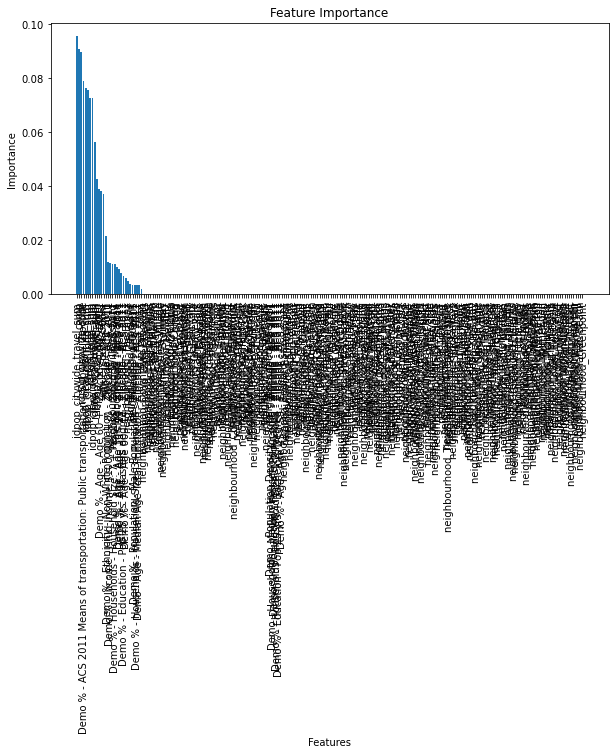

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline

#Get feature importances
feature_mi = dt.feature_importances_

#Sort indices
featureinds = feature_mi.argsort()

plt.figure(figsize=(10,5))
plt.title("Feature Importance")

#Plot features in order of importance
plt.bar(X_train.columns.values[featureinds[::-1]],feature_mi[featureinds[::-1]])
plt.xticks(X_train.columns.values[featureinds[::-1]],rotation="90")
plt.xlabel('Features')
plt.ylabel('Importance')

plt.show()


In [121]:
from sklearn.metrics import accuracy_score

#Make predictions for both training and test data
predictions_train=dt.predict(X_train)
predictions_test=dt.predict(X_test)

#Compute accuracies
train_accuracy=accuracy_score(Y_train,predictions_train)
test_accuracy=accuracy_score(Y_test,predictions_test)

print("Training Accuracy is " + str(train_accuracy))
print("Test Accuracy is " + str(test_accuracy))

Training Accuracy is 0.6428927370125825
Test Accuracy is 0.5426008968609866


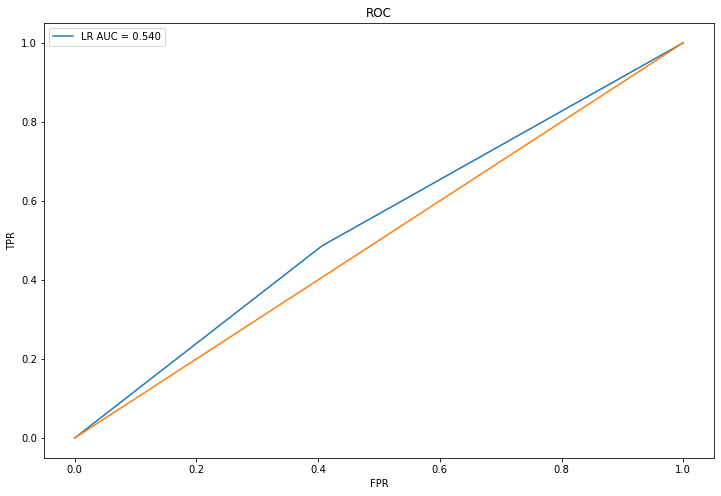

In [122]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, svm, metrics

#lr_model = linear_model.LogisticRegression(C=1e30)
#lr_model.fit(X_train, Y_train)
#predictions_lr = lr_model.predict_proba(X_test)[:,1]
predictions_dt = dt.predict(X_test)

#svm_model = svm.SVC(kernel="linear")
#svm_model.fit(X_train, Y_train)
#predictions_svm = svm_model.decision_function(X_test)

plt.figure(figsize=(12,8))

#Plot LR ROC/AUC
fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions_dt)
auc = metrics.auc(fpr,tpr)
label = "LR AUC = %.3f"%auc
plt.plot(fpr,tpr,label = label)


#Plot 45 degree line
plt.plot([0,1],[0,1])

plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

plt.show()

In [ ]:
#Standardize Features

Bakeoff

Models:
- Decision Tree
- Logistic Regression
- SVM
- GB
- RF
- NB

Features:
- All
- All - Neighbourhoods
- Dimensionality Reduction

Hyperparameters:
- Decision Trees (Faizan)
 - min sample split, min leaf size
- Logistic (Connor)
 - Regularization weight
 - L1 vs. L2
- SVM (Connor)
 - Weight
 - Kernel
- GB (Abbas/Audrey)
 - Max Depth / min sample split / min leaf
 - number of trees
- RF (Abbas/Audrey)
 - number of trees
 - number of features
    

Evaluation metrics:
- Accuracy
- AUC
- Precision